In [ ]:
# Importando as bibliotecas que serão utilizadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [125]:
# Leitura do nosso dataset | Dataset será armazenado na variável df.

df = pd.read_csv('Spotify_Youtube.csv')
df.head()
df.shape

(20718, 28)

In [115]:
# Limpeza | Tirando as colunas não numéricas, dataset apenas com numeros será armazenado na variável data.
# A função loc serve para recortar o dataframe, os : (dois pontos) servem para indicar a linha inicial e final. Como queremos usar todas as linhas, coloquei apenas os : (dois pontos).
# Após os dois pontos, dentro dos colchetes temos as colunas que desejamos usar no trabalho.
# Removemos valores Nan do dataframe com a função dropna() e armazenamos na variável data1.

data = df.loc[:, ['Views', 'Likes']]
data1 = data.dropna()

In [116]:
# Cálculo da matriz de covariância

matriz_cov = data1.cov()
matriz_cov

,Views,Likes
Views,7.566906e+16,4.386067e+14
Likes,4.386067e+14,3.201681e+12


In [117]:
# Cálculo dos Autovalores e Autovetores de cov(data).
# E ordenando os Autovalores e Autovetores

eigenvalues, eigenvectors = np.linalg.eig(matriz_cov)

sorted_indices = np.argsort(-eigenvalues)

sorted_eigenValues = eigenvalues[sorted_indices]

sorted_eigenVectors = eigenvectors[:, sorted_indices]

print("Autovalores: ", sorted_eigenValues)
print("Autovetores: \n", sorted_eigenVectors)

Autovalores:  [7.56716066e+16 6.59327856e+11]
Autovetores: 
 [[ 0.9999832  -0.00579633]
 [ 0.00579633  0.9999832 ]]


In [134]:
#Seleção do Autovetor para o PCA

principal_eigenVector = sorted_eigenVectors[:, 0]

projection = data1.dot(principal_eigenVector)

projection_df = pd.DataFrame(projection, columns=['PCA'])

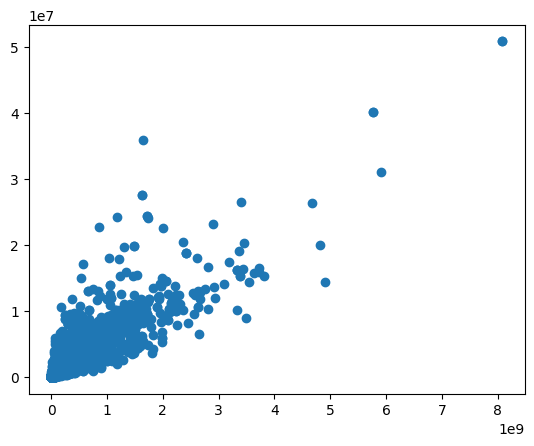

In [122]:
plt.scatter(data1['Views'], data1['Likes'])
plt.show()

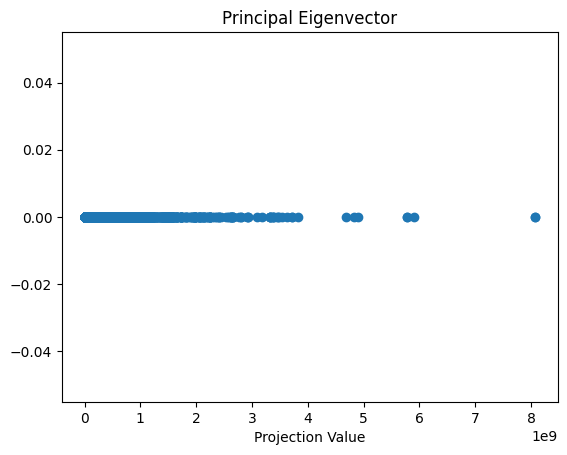

In [136]:
# função zeros_like cria um array de zeros na mesma proporção de um array escolhido

plt.scatter(projection, np.zeros_like(projection))
plt.title('Principal Eigenvector')
plt.xlabel('Projection Value')
plt.show()